In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as tk
import pydot
print("tensorflow v.", tf.__version__, ";  keras v.",tf.keras.__version__)

tensorflow v. 1.13.1 ;  keras v. 2.2.4-tf



x1_train: [[2.0, 1.0], [4.0, 1.5], [3.0, 1.0], [3.5, 0.5], [2.0, 0.5], [5.5, 1.0], [1.0, 1.0]] 
y_train: [[0.0], [1.0], [0.0], [1.0], [0.0], [1.0], [0.0]] 
x1_test: [[4.5, 1.0]]


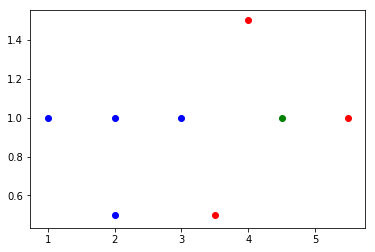

In [2]:
#define data

#known flower length and width measurements
#x_train[flower#][l,w]
data_x = [
    [2.0,1.0],
    [4.0,1.5],
    [3.0,1.0], 
    [3.5,0.5],
    [2.0,0.5],
    [5.5,1.0],     
    [1.0,1.0]]

#known flower types (blue = 0; red  = 1)
#y_train[flower#][type]
data_y = [
    [0.0],
    [1.0],
    [0.0],
    [1.0],
    [0.0],
    [1.0],
    [0.0]]

#flower with unknown color
#x_test[l, w]
data_test = [[4.5,1.0]]


#verify
print ("\r\nx1_train:", data_x, 
       "\r\ny_train:",data_y,
       "\r\nx1_test:",data_test)

#scatter plot of data
for i in range(0, len(data_x)):
    color = 'r'
    if data_y[i][0] == 0.0: color = 'b'
    plt.scatter(data_x[i][0], data_x[i][1], c=color)
    
#mystery flower
plt.scatter(data_test[0][0], data_test[0][1], c='g')

In [3]:
##scale values 
##model works best with values within the range (0,1)
##arbitrarily choose 1/10 sclae (or you could determine the max value within the data set(s))
scalar = 10

##convert numpy list to tensor
x_train = tf.convert_to_tensor(data_x)

##scale tensor to within (0,1)
x_train = tf.divide(x_train, scalar)

##convert numpy list to tensor (these values are already within (0,1), no need to convert)
y_train = tf.convert_to_tensor(data_y)


##convert numpy list to tensor
x_test = tf.convert_to_tensor(data_test)

##scale tensor to within (0,1)
x_test = tf.divide(x_test, scalar)

In [4]:
##Keras Sequential Model
##http://faroit.com/keras-docs/2.0.1/getting-started/sequential-model-guide/
##sequential (feed forward type)
#model = tk.models.Sequential()

##add Dense layer with
#    #input tensor of size [2] (coresponding to (l,y))
#    #linear activation function
#    #output tensor size of [1] one dimension
#    #labled "l_in"
#model.add(tk.layers.Dense(1, use_bias=True, input_shape=[2], name="l_in"))    
    
##add Dense layer
#    #sigmoid as the activation function
#    #output tensor size of [1] (the prediction)
#    #labled "l_sig" (arbitrary for identification)
#model.add(tk.layers.Dense(1, use_bias=False, activation='sigmoid', name="l_sig"))

##creates model with 
#    #adam optimizer (good default solver)
#    #loss function MSE (as seen in tutorial)
#    #metric, does not effect training, shows rate of correct predictions as model searches
#model.compile(optimizer='adam',
#              loss='mean_squared_error',
#              metrics=['binary_accuracy'])

In [5]:
##Keras Functional API approach
#http://faroit.com/keras-docs/2.0.1/getting-started/functional-api-guide/

##define input shape
ins = tk.Input(shape=[2])

##apply linear activation Dense layer with bias to input, 'ins'
x = tk.layers.Dense(1, use_bias=True, name="l_in1").apply(ins)

##apply sigmoid activation Dense layer witout bias to 'x'
prediction = tk.layers.Dense(1, use_bias=False, activation='sigmoid', name="l_dns").apply(x)#(ins)

##define model with input 'ins' and output 'prediction'
model = tk.Model(inputs=ins, outputs=prediction)

##creates model with 
#    #adam optimizer (good default solver)
#    #loss function MSE (as seen in tutorial)
#    #metric, does not effect training, shows rate of correct predictions as model searches
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['binary_accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [6]:
#verify
model.summary()
tk.utils.plot_model(model)
for l in model.layers :
    for i in l.trainable_variables :
        print(i , "\r\n")

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 2)                 0         
_________________________________________________________________
l_in1 (Dense)                (None, 1)                 3         
_________________________________________________________________
l_dns (Dense)                (None, 1)                 1         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________
<tf.Variable 'l_in1/kernel:0' shape=(2, 1) dtype=float32> 

<tf.Variable 'l_in1/bias:0' shape=(1,) dtype=float32> 

<tf.Variable 'l_dns/kernel:0' shape=(1, 1) dtype=float32> 



In [7]:
#train neural network, defining
    #x valiable populated from x_train
    #y variable populated from y_train
    #number of macro iterations (epochs)
    #number of micro interations (steps per epoch)
    
#train ALL
model.fit(x=x_train, y=y_train, epochs=5, steps_per_epoch=1000)

#verify
for l in model.layers :
    for i in range(0, len(l.trainable_variables)) :
        print(l.trainable_variables[i] )
        print(l.get_weights()[i])

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
1000/1000 [==============================] - 2s 2ms/step - loss: 0.2641 - binary_accuracy: 0.5714
Epoch 2/5
1000/1000 [==============================] - 2s 2ms/step - loss: 0.2446 - binary_accuracy: 0.5714
Epoch 3/5
1000/1000 [==============================] - 1s 1ms/step - loss: 0.2002 - binary_accuracy: 0.7296
Epoch 4/5
1000/1000 [==============================] - 1s 1ms/step - loss: 0.1190 - binary_accuracy: 0.8626
Epoch 5/5
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0783 - binary_accuracy: 1.0000
<tf.Variable 'l_in1/kernel:0' shape=(2, 1) dtype=float32>
[[-3.5325139 ]
 [ 0.07050297]]
<tf.Variable 'l_in1/bias:0' shape=(1,) dtype=float32>
[1.1301459]
<tf.Variable 'l_dns/kernel:0' shape=(1, 1) dtype=float32>
[[-3.984139]]


In [8]:
#get the model's prediction of the mystery flower
prediction = model.predict(x_test, steps=1)
print(prediction)

[[0.8584607]]


In [9]:
#save model (in current directory)
model.save('gnn-flower-model')

In [10]:
#load model
flower_model = tk.models.load_model('gnn-flower-model')

In [11]:
#function to interpret predictions
#define a treshold for determining plant type; here it is set to 0.5
def interpret(nnprediction):
    if nnprediction >= 0.5: 
        return 'red'
    else:
        return 'blue' 

#get interpretation of the model's mystery flower prediction
prediction = flower_model.predict(x_test, steps=1)
print("Mystery Flower predicted to be :", interpret(prediction))

#get interpretations of the model's prediction of all known flowers
for f in range(0, len(data_x)) :
    predf = flower_model.predict([x_train], steps=1)
    print( data_x[f], predf[f], data_y[f], interpret(predf[f]) )


Mystery Flower predicted to be : red
[2.0, 1.0] [0.15239453] [0.0] blue
[4.0, 1.5] [0.7474047] [1.0] red
[3.0, 1.0] [0.4234713] [0.0] blue
[3.5, 0.5] [0.60089755] [1.0] red
[2.0, 0.5] [0.15421759] [0.0] blue
[5.5, 1.0] [0.9612076] [1.0] red
[1.0, 1.0] [0.0421545] [0.0] blue
